In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

In [3]:
# Get dataset
df = pd.read_excel("/content/completed_orders_with_scores.xlsx") # Use read_excel to read excel files
df.head()


ID NAME      MOBILE    MOBILE.1  source points   SOURCE_opportunities  \
0  4025646  NaN  8105198313  8105198313               4                     0   
1  4003400  NaN  7411706699  7411706699               4                     0   
2  3993629  NaN  9481119933  9481119933               4                     0   
3  3910078  NaN  7382424115  7382424115               4                     0   
4  4036028  NaN  9686484281  9686484281               4                     0   

   status points   STATUS_opportunities  gro region point   GEO_REGION_ID  \
0               4                     4                 14            3.0   
1               4                     4                 14            3.0   
2               4                     4                 14            3.0   
3               4                     4                 14            3.0   
4               4                     4                 14            3.0   

   ... SHIFTING_TYPE drop geo region points DROP_GEO_REGION_ID  \
0  ...    intra_city                     14                3.0   
1  ...    intra_city                     14                3.0   
2  ...    intra_city                     14                3.0   
3  ...    intra_city                     14                3.0   
4  ...    intra_city                     14                3.0   

  platform point  PLATFORM  score          CRN  SOURCE_orders  STATUS_orders  \
0               2  android     48  PNM16761854              1      completed   
1               2  android     48  PNM69221549              1      completed   
2               2  android     48  PNM83462037              1      completed   
3               2  android     48  PNM84219966              1      completed   
4               2  android     48  PNM09141189              1      completed   

  SERVICE_TYPE  
0      Default  
1      Default  
2      Default  
3      Default  
4      Default  

[5 rows x 31 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9635 entries, 0 to 9634
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      9635 non-null   int64  
 1   NAME                    6961 non-null   object 
 2   MOBILE                  9635 non-null   int64  
 3   MOBILE.1                9635 non-null   int64  
 4   source points           9635 non-null   int64  
 5   SOURCE_opportunities    9635 non-null   int64  
 6   status points           9635 non-null   int64  
 7   STATUS_opportunities    9635 non-null   int64  
 8   gro region point        9635 non-null   int64  
 9   GEO_REGION_ID           9014 non-null   float64
 10  PICKUP_LOCATION         9014 non-null   object 
 11  PICKUP_ADDRESS          9014 non-null   object 
 12  DROP_LOCATION           9014 non-null   object 
 13  DROP_ADDRESS            9014 non-null   object 
 14  SHIFTING_TS             9014 non-null   

In [5]:
df.describe()


ID        MOBILE      MOBILE.1  source points   \
count  9.635000e+03  9.635000e+03  9.635000e+03     9635.000000   
mean   3.955012e+06  8.830412e+09  8.830412e+09        4.714375   
std    1.572486e+05  9.825253e+08  9.825253e+08        0.579918   
min    3.147067e+06  6.000154e+09  6.000154e+09        1.000000   
25%    3.973512e+06  8.104442e+09  8.104442e+09        5.000000   
50%    4.005330e+06  9.022230e+09  9.022230e+09        5.000000   
75%    4.025700e+06  9.716489e+09  9.716489e+09        5.000000   
max    4.055491e+06  9.999992e+09  9.999992e+09        5.000000   

       SOURCE_opportunities  status points   STATUS_opportunities  \
count           9635.000000     9635.000000           9635.000000   
mean               1.649818        3.833108              3.833108   
std                0.884701        0.374288              0.374288   
min                0.000000        1.000000              1.000000   
25%                2.000000        4.000000              4.000000   
50%                2.000000        4.000000              4.000000   
75%                2.000000        4.000000              4.000000   
max                4.000000        4.000000              4.000000   

       gro region point   GEO_REGION_ID  source detail points          SR_ID  \
count        9635.000000     9014.00000            9635.000000  9.635000e+03   
mean           11.153191        3.68793               0.586092  3.501443e+06   
std             3.658989        2.48245               1.136671  8.395107e+05   
min             0.000000        1.00000               0.000000  5.490000e+02   
25%            10.000000        2.00000               0.000000  3.590030e+06   
50%            12.000000        3.00000               0.000000  3.877568e+06   
75%            14.000000        4.00000               0.000000  3.910512e+06   
max            14.000000       14.00000               3.000000  3.959362e+06   

       dispostion points   shifting type points  drop geo region points  \
count         9635.000000                   1.0             9635.000000   
mean             2.582667                   2.0               11.146757   
std              2.910379                   NaN                3.659593   
min              0.000000                   2.0                0.000000   
25%              0.000000                   2.0               10.000000   
50%              0.000000                   2.0               12.000000   
75%              6.000000                   2.0               14.000000   
max              7.000000                   2.0               14.000000   

       DROP_GEO_REGION_ID  platform point         score  SOURCE_orders  
count         9014.000000      9635.000000  9635.000000    9635.000000  
mean             3.686377         1.371458    35.387649       0.999481  
std              2.476034         0.715900     7.282285       0.693769  
min              1.000000         0.000000    10.000000       0.000000  
25%              2.000000         1.000000    33.000000       1.000000  
50%              3.000000         2.000000    37.000000       1.000000  
75%              4.000000         2.000000    39.000000       1.000000  
max             14.000000         2.000000    48.000000       4.000000

In [6]:
print(df.columns)




Index(['ID', 'NAME', 'MOBILE', 'MOBILE.1', 'source points ',
       'SOURCE_opportunities', 'status points ', 'STATUS_opportunities',
       'gro region point ', 'GEO_REGION_ID', 'PICKUP_LOCATION',
       'PICKUP_ADDRESS', 'DROP_LOCATION', 'DROP_ADDRESS', 'SHIFTING_TS',
       'source detail points ', 'SOURCE_DETAIL', 'SR_ID', 'dispostion points ',
       'DISPOSITION', 'shifting type points', 'SHIFTING_TYPE',
       'drop geo region points', 'DROP_GEO_REGION_ID', 'platform point ',
       'PLATFORM', 'score', 'CRN', 'SOURCE_orders', 'STATUS_orders',
       'SERVICE_TYPE'],
      dtype='object')


In [7]:
df.columns = df.columns.str.strip()


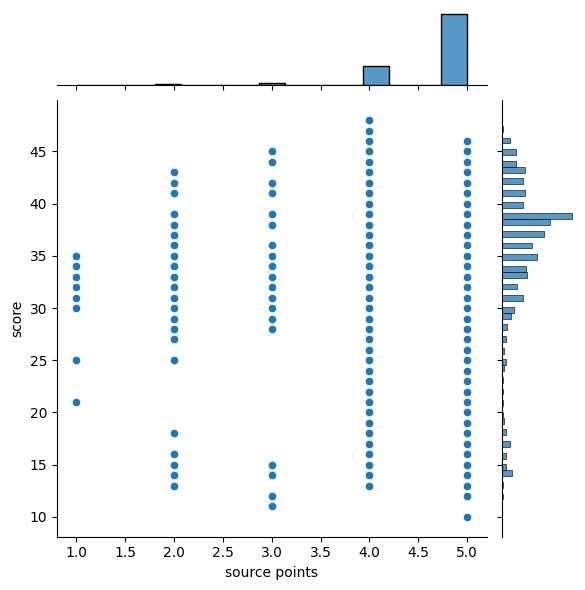

In [8]:
sns.jointplot(x="source points", y="score", data=df)


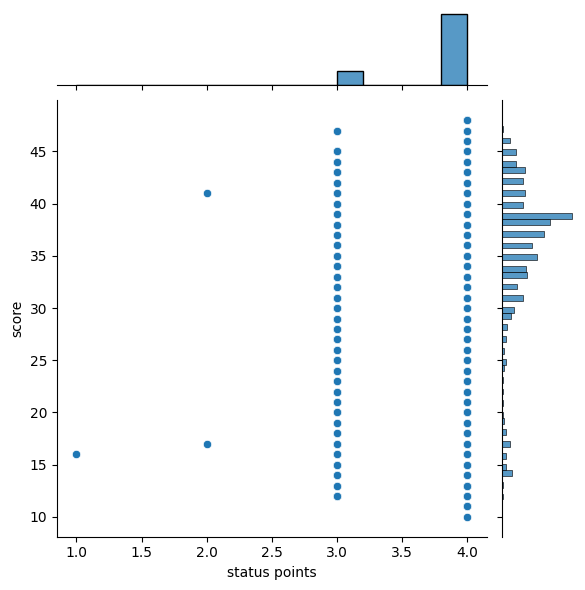

In [9]:
sns.jointplot(x="status points", y="score", data=df)

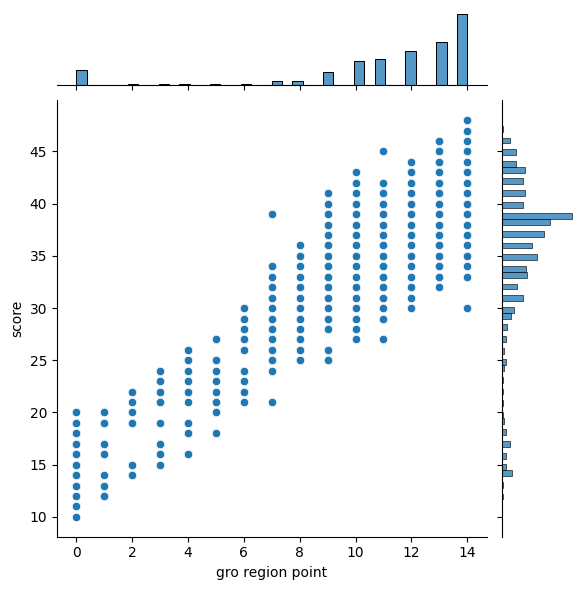

In [10]:
sns.jointplot(x="gro region point", y="score", data=df)

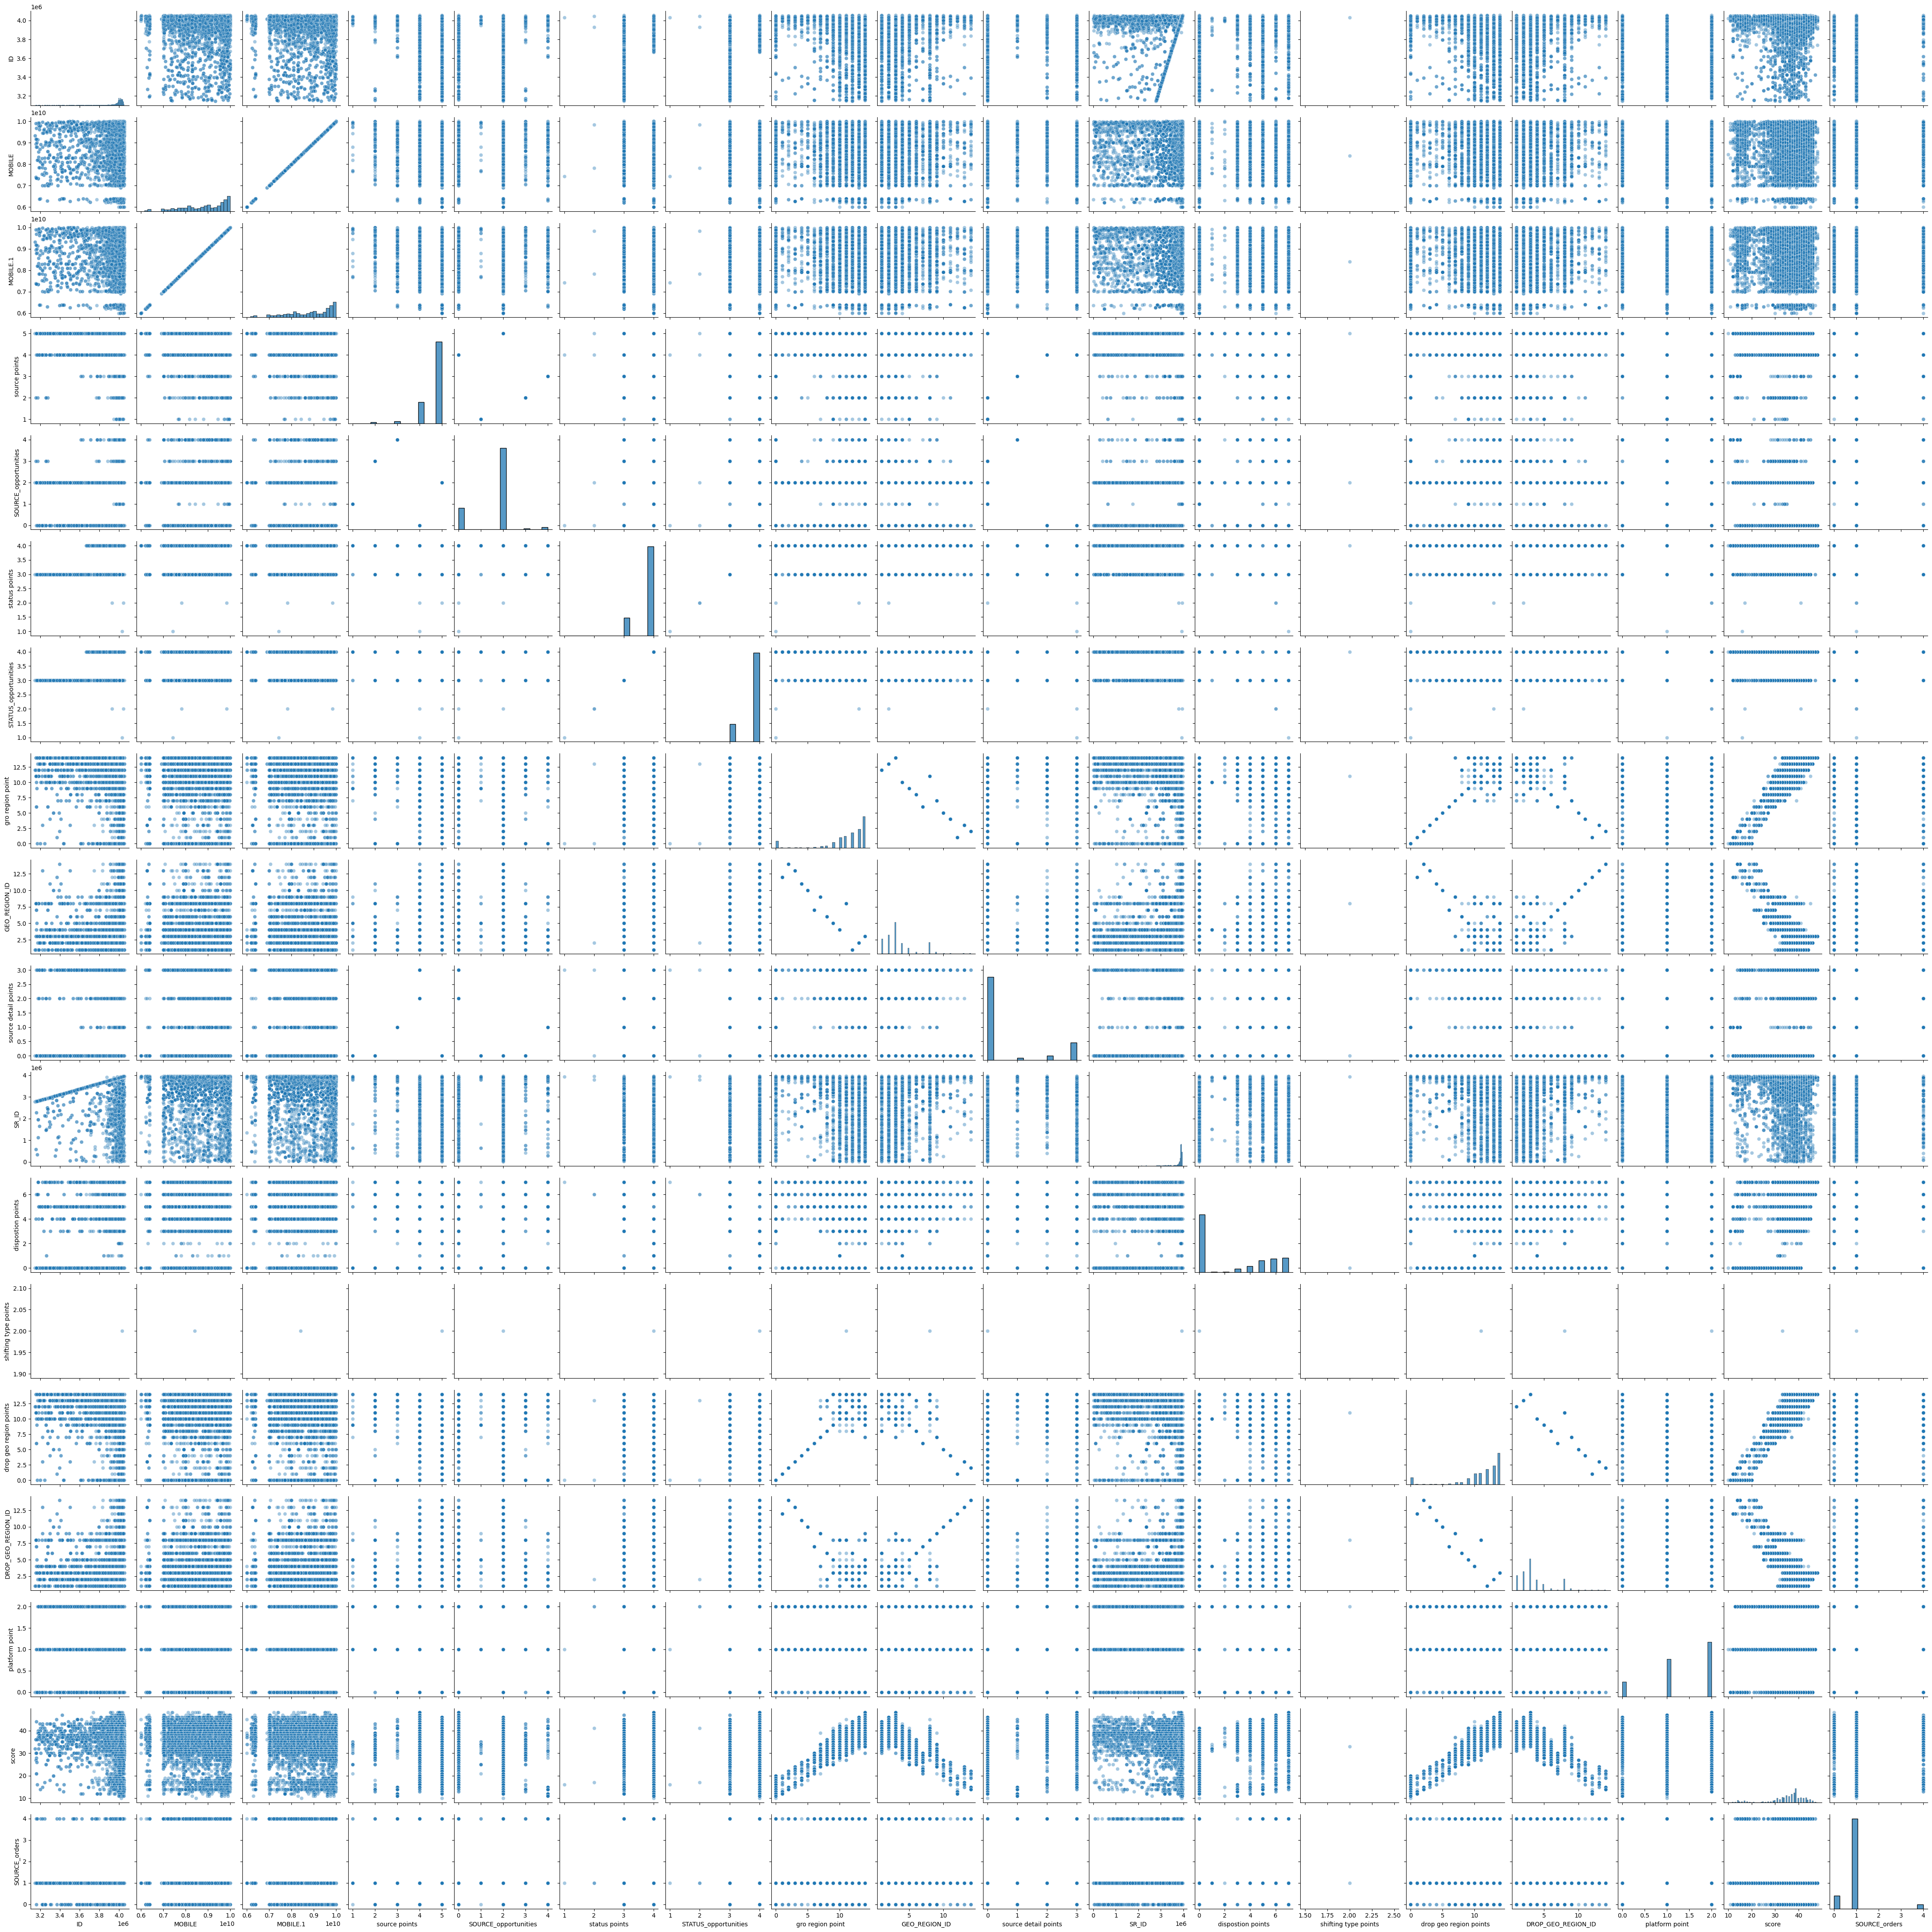

In [ ]:
sns.pairplot(df, kind="scatter", plot_kws={"alpha" : 0.4})

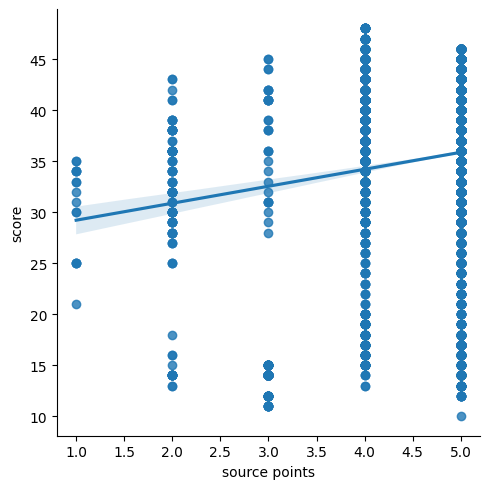

In [12]:
sns.lmplot(x="source points", y="score", data=df)


In [13]:
X = df[['source points']]  # 自变量 (二维)
y = df['score']  # 因变量 (一维)

# 初始化线性回归模型
model = LinearRegression()

# 拟合模型
model.fit(X, y)

# 获取系数和截距
coefficient = model.coef_[0]  # 系数
intercept = model.intercept_  # 截距

# 输出系数和截距
print(f"Coefficient (系数): {coefficient}")
print(f"Intercept (截距): {intercept}")

Coefficient (系数): 1.6629254900357828
Intercept (截距): 27.547995377903955


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [15]:
x=df[['source points', 'status points', 'gro region point', 'source detail points', 'dispostion points', 'drop geo region points', 'platform point']]
y=df['score']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # Split the data into training and testing sets
X_train

source points  status points  gro region point  source detail points  \
455               4              4                11                     3   
8497              5              4                 9                     0   
1197              5              3                14                     0   
9293              5              3                 3                     0   
2726              5              4                14                     0   
...             ...            ...               ...                   ...   
5734              4              4                 9                     3   
5191              5              4                13                     0   
5390              4              4                 9                     3   
860               5              3                14                     0   
7270              5              4                11                     0   

      dispostion points  drop geo region points  platform point  
455                   7                      14               2  
8497                  0                       9               1  
1197                  5                      14               1  
9293                  0                       3               1  
2726                  0                      14               2  
...                 ...                     ...             ...  
5734                  7                       9               0  
5191                  0                      13               2  
5390                  7                       9               0  
860                   5                      14               2  
7270                  0                      11               2  

[7708 rows x 7 columns]

In [17]:
# Check for missing values in X_train
nan_locations = X_train[X_train.isnull().any(axis=1)]

# Print the rows with missing values
print(nan_locations)

Empty DataFrame
Columns: [source points, status points, gro region point, source detail points, dispostion points, drop geo region points, platform point]
Index: []


In [18]:
#training the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
model.coef_

array([1., 1., 1., 1., 1., 1., 1.])

In [21]:
cdf = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
print(cdf)

                        Coefficient
source points                   1.0
status points                   1.0
gro region point                1.0
source detail points            1.0
dispostion points               1.0
drop geo region points          1.0
platform point                  1.0


In [22]:
#predictions
predictions = model.predict(X_test)
predictions

array([30., 32., 38., ..., 36., 26., 35.])

Text(0.5, 1.0, 'Predictions vs. Actual Values')

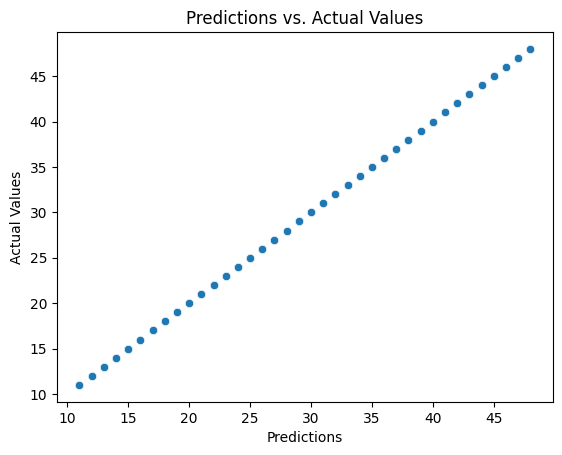

In [24]:
sns.scatterplot (x=predictions, y=y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual Values')
plt.title('Predictions vs. Actual Values')

In [25]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))

MAE: 6.990199228423508e-15
MSE: 1.0408378976349388e-28


In [27]:
#residuals
residuals = y_test - predictions
residuals


8209   -7.105427e-15
7480    0.000000e+00
3749    0.000000e+00
9343   -2.486900e-14
2115    7.105427e-15
            ...     
5350    0.000000e+00
1222    1.421085e-14
5605   -7.105427e-15
8665   -1.065814e-14
5851    0.000000e+00
Name: score, Length: 1927, dtype: float64

<ipython-input-29-0fc4e027b71b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins= 20)


<Axes: xlabel='score', ylabel='Density'>

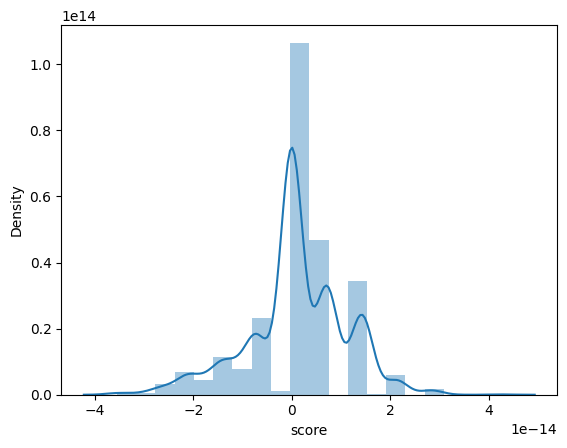

In [29]:
sns.distplot(residuals, bins= 20) #test normality